In [1]:
#本章需导入的模块
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.model_selection import train_test_split,KFold
import sklearn.neural_network as net
import sklearn.linear_model as LM
from scipy.stats import multivariate_normal
from sklearn.metrics import r2_score,mean_squared_error,classification_report
from sklearn import svm
import os

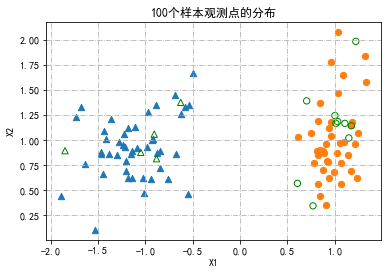

In [2]:
N=100
X,Y=make_classification(n_samples=N,n_features=2,n_redundant=0,n_informative=2,class_sep=1,random_state=1,n_clusters_per_class=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=123)
markers=['^','o']
for k,m in zip([1,0],markers):
    plt.scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=40)
for k,m in zip([1,0],markers):
    plt.scatter(X_test[Y_test==k,0],X_test[Y_test==k,1],marker=m,s=40,c='',edgecolors='g')
plt.title("100个样本观测点的分布")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True,linestyle='-.')
plt.show()   


代码说明：
（1）第1，2行：生成用于二分类的样本量N=100的一组随机样本，包括两个输入变量。同时指定两个分类的样本观测点彼此不相交。
（2）第3行：利用旁置法按85%和15%将数据集划分成训练集和测试集。
（3）第5至13行：分别将训练集和测试集的样本观测，以不同符号和颜色绘制在图上。


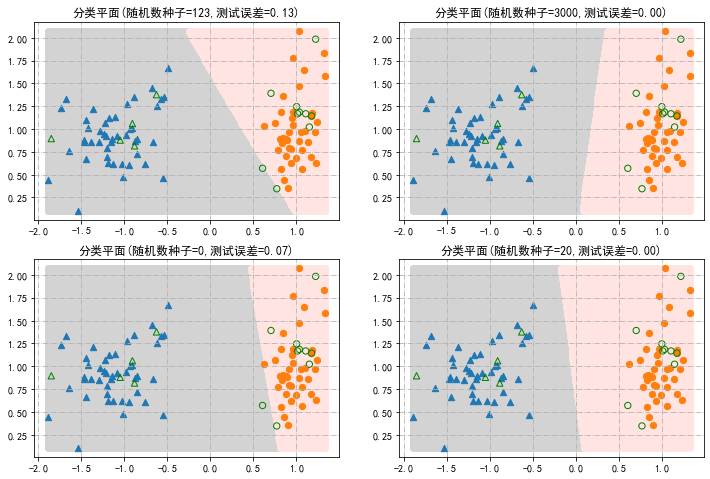

In [3]:
X1,X2= np.meshgrid(np.linspace(X_train[:,0].min(),X_train[:,0].max(),300),np.linspace(X_train[:,1].min(),X_train[:,1].max(),300))
X0=np.hstack((X1.reshape(len(X1)*len(X2),1),X2.reshape(len(X1)*len(X2),1)))

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8))
for seed,H,L in [(123,0,0),(3000,0,1),(0,1,0),(20,1,1)]:
    NeuNet=net.MLPClassifier(activation='logistic',random_state=seed,hidden_layer_sizes=(10,),max_iter=200)
    NeuNet.fit(X_train,Y_train)
    #NeuNet.out_activation_  #输出节点的激活函数
    Y0=NeuNet.predict(X0)
    axes[H,L].scatter(X0[np.where(Y0==1),0],X0[np.where(Y0==1),1],c='lightgray')
    axes[H,L].scatter(X0[np.where(Y0==0),0],X0[np.where(Y0==0),1],c='mistyrose')
    for k,m in [(1,'^'),(0,'o')]:
        axes[H,L].scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=40)
        axes[H,L].scatter(X_test[Y_test==k,0],X_test[Y_test==k,1],marker=m,s=40,c='',edgecolors='g')
    axes[H,L].grid(True,linestyle='-.')
    axes[H,L].set_title("分类平面(随机数种子=%d,测试误差=%.2f)"%(seed,1-NeuNet.score(X_test,Y_test)))


代码说明：
（1）第1，2行：为绘制分类边界准备数据：为在两个输入变量取值范围内的90000个样本观测点。
（2）第4至16行：利用for循环进行四次感知机网络的训练。